# Doing frequentist statistics with Scipy  
  
### PyData DC 2016  
  
*Gustavo A. Patino*  
*Department of Biomedical Sciences*  
*Department of Neurology*  
*Oakland University William Beaumont School of Medicine*  
*Rochester, MI*  
  
patino@oakland.edu  
https://github.com/gapatino/Doing-frequentist-statistics-with-Scipy

**Iris Dataset:**  
Fisher RA. The use of multiple measurements in taxonomic problems. *Annals of Eugenics* 1936; 7 (2): 179–188

https://github.com/gapatino/Doing-frequentist-statistics-with-Scipy

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

from tkinter import filedialog

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Use file browser to find name and path of the CSV file that contains the dataset
data_file = filedialog.askopenfilename()
print(data_file)

/Users/patino/Documents/Presentations/PyData/PyData DC 2016/frequentist statistics/iris_dataset.csv


**Loading the dataset**

In [3]:
dataset = pd.read_csv(data_file, sep=',', na_values=["."," ","na"]) # Can use lists for possible missing values
dataset.shape

(150, 5)

In [4]:
dataset.columns

Index(['Type', 'Petal_Width', 'Petal_Length', 'Sepal_Width', 'Sepal_Length'], dtype='object')

In [15]:
dataset.head(n=10)

,Type,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
0,setosa,2,14,33,50
1,virginica,24,56,31,67
2,virginica,23,51,31,69
3,setosa,2,10,36,46
4,virginica,20,52,30,65
5,virginica,19,51,27,58
6,versicolor,13,45,28,57
7,versicolor,16,47,33,63
8,virginica,17,45,25,49
9,versicolor,14,47,32,70


**Exploratory analysis**

In [6]:
dataset.describe(percentiles=[.25, .5, .75], include='all')

,Type,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
count,150,150.000000,150.000000,150.000000,150.000000
unique,3,NaN,NaN,NaN,NaN
top,versicolor,NaN,NaN,NaN,NaN
freq,50,NaN,NaN,NaN,NaN
mean,NaN,11.926667,37.786667,30.553333,58.446667
std,NaN,7.569008,17.776233,4.372791,8.268592
min,NaN,1.000000,10.000000,20.000000,43.000000
25%,NaN,3.000000,16.000000,28.000000,51.000000
50%,NaN,13.000000,44.000000,30.000000,58.000000
75%,NaN,18.000000,51.000000,33.000000,64.000000


In [7]:
grouped_iris = dataset.groupby('Type')
grouped_iris.mean()

,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
Type,,,,
setosa,2.46,14.62,34.28,50.10
versicolor,13.26,43.22,27.64,59.36
virginica,20.06,55.52,29.74,65.88


In [8]:
grouped_iris.describe(percentiles=[.25, .5, .75], include='all')

Petal_Length  Petal_Width  Sepal_Length  Sepal_Width
Type                                                                  
setosa     count     50.000000    50.000000     50.000000    50.000000
           mean      14.620000     2.460000     50.100000    34.280000
           std        1.736640     1.053856      3.535534     3.790644
           min       10.000000     1.000000     43.000000    23.000000
           25%       14.000000     2.000000     48.000000    32.000000
           50%       15.000000     2.000000     50.000000    34.000000
           75%       15.750000     3.000000     52.000000    36.750000
           max       19.000000     6.000000     58.000000    44.000000
versicolor count     50.000000    50.000000     50.000000    50.000000
           mean      43.220000    13.260000     59.360000    27.640000
           std        5.361579     1.977527      5.161711     3.141298
           min       30.000000    10.000000     49.000000    20.000000
           25%       40.000000    12.000000     56.000000    25.250000
           50%       44.000000    13.000000     59.000000    28.000000
           75%       47.000000    15.000000     63.000000    30.000000
           max       56.000000    18.000000     70.000000    34.000000
virginica  count     50.000000    50.000000     50.000000    50.000000
           mean      55.520000    20.060000     65.880000    29.740000
           std        5.518947     2.902567      6.358796     3.224966
           min       45.000000    13.000000     49.000000    22.000000
           25%       51.000000    18.000000     62.250000    28.000000
           50%       55.500000    20.000000     65.000000    30.000000
           75%       58.750000    22.750000     69.000000    31.750000
           max       69.000000    25.000000     79.000000    38.000000

Type
setosa        Axes(0.125,0.125;0.775x0.775)
versicolor    Axes(0.125,0.125;0.775x0.775)
virginica     Axes(0.125,0.125;0.775x0.775)
Name: Petal_Width, dtype: object

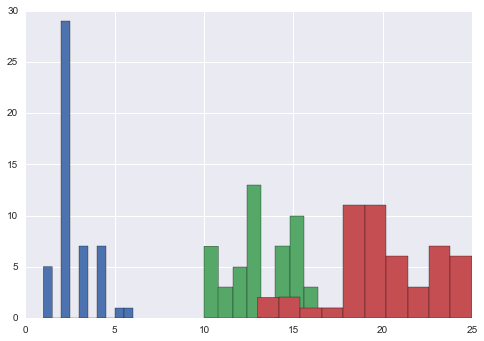

In [77]:
grouped_iris['Petal_Width'].hist()

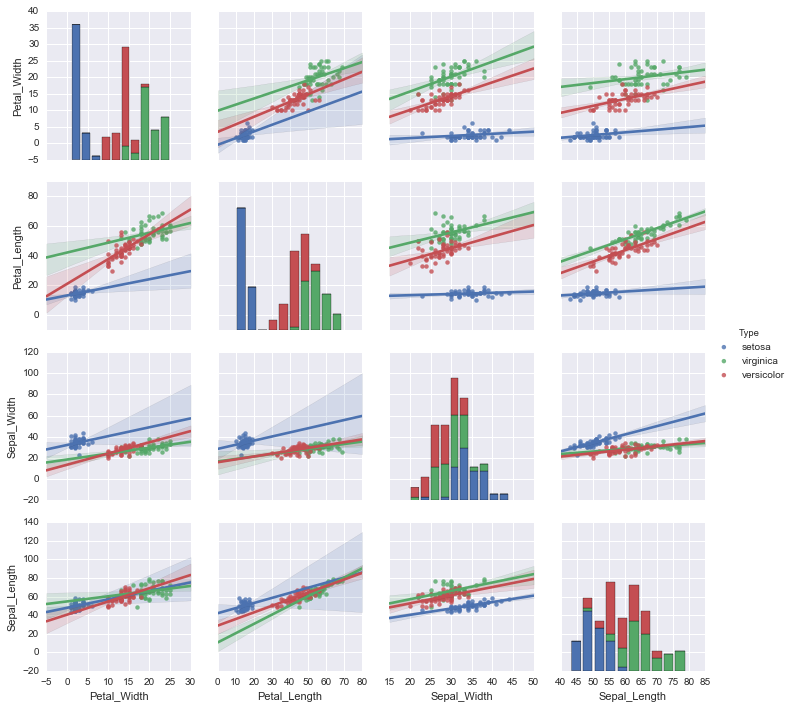

In [9]:
sns.pairplot(dataset, kind='reg', hue='Type')

**Data Extraction**

In [10]:
grouped_iris['Type'] # .groupby function returns a GroupBy object that is lazily executed

In [13]:
dataset[dataset['Type']=='setosa'].head(n=10) # Better to use the original dataset

,Type,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
0,setosa,2,14,33,50
3,setosa,2,10,36,46
10,setosa,2,16,31,48
12,setosa,1,14,36,49
13,setosa,2,13,32,44
17,setosa,2,16,38,51
18,setosa,2,16,30,50
20,setosa,4,19,38,51
21,setosa,2,14,30,49
24,setosa,2,14,36,50


In [14]:
dataset[dataset['Type']=='setosa']['Petal_Length'].head(n=10)

0     14
3     10
10    16
12    14
13    13
17    16
18    16
20    19
21    14
24    14
Name: Petal_Length, dtype: int64

In [27]:
pl_setosa = dataset[dataset['Type']=='setosa']['Petal_Length']
pl_virginica = dataset[dataset['Type']=='virginica']['Petal_Length']
pl_versicolor = dataset[dataset['Type']=='versicolor']['Petal_Length']

In [28]:
pw_setosa = dataset[dataset['Type']=='setosa']['Petal_Width']
pw_virginica = dataset[dataset['Type']=='virginica']['Petal_Width']
pw_versicolor = dataset[dataset['Type']=='versicolor']['Petal_Width']

sl_setosa = dataset[dataset['Type']=='setosa']['Sepal_Length']
sl_virginica = dataset[dataset['Type']=='virginica']['Sepal_Length']
sl_versicolor = dataset[dataset['Type']=='versicolor']['Sepal_Length']

sw_setosa = dataset[dataset['Type']=='setosa']['Sepal_Width']
sw_virginica = dataset[dataset['Type']=='virginica']['Sepal_Width']
sw_versicolor = dataset[dataset['Type']=='versicolor']['Sepal_Width']

In [85]:
type(sw_setosa)

pandas.core.series.Series

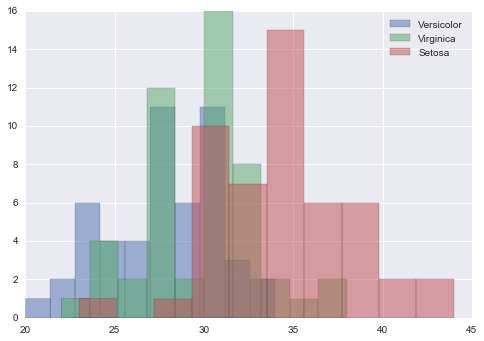

In [84]:
plt.hist(sw_versicolor, label='Versicolor', alpha=0.5)
plt.hist(sw_virginica, label='Virginica', alpha=0.5)
plt.hist(sw_setosa, label='Setosa', alpha=0.5)
plt.legend(loc='best')

**Normality Testing**

In [37]:
# Kolmogorov-Smirnov test: Fairly conservative
ks_pl_setosa = stats.kstest(pl_setosa, 'norm', mode='asymp') # mode opts: 'approx'. Dist can be any in scipy.stats
ks_pl_setosa

KstestResult(statistic=1.0, pvalue=7.4401519520415657e-44)

In [33]:
# Shapiro test
shapiro_pw_setosa , p_shapiro_pw_setosa = stats.shapiro(pw_setosa)
p_shapiro_pw_setosa

8.65842082475865e-07

In [40]:
# Normal test: Combines skew and kurtosis measurement. Allows management of NaN
nt_sl_setosa , p_nt_sl_setosa = stats.normaltest(sl_setosa, nan_policy='omit') #nan_policy opts: 'propagate', 'raise'
p_nt_sl_setosa

NormaltestResult(statistic=0.16963916001883134, pvalue=0.91867801732947774)


0.91867801732947774

In [42]:
# Anderson test: Modified KS, returns critical values for a list of significance levels
anderson_sw_setosa = stats.anderson(sw_setosa, dist='norm')
anderson_sw_setosa

AndersonResult(statistic=0.49095595829555094, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

**Homogeneity of Variance**

In [49]:
# Bartlett test: Requires normal populations
bartlett_length_versicolor = stats.bartlett(pl_versicolor, sl_versicolor)
print(bartlett_length_versicolor)

BartlettResult(statistic=0.06998884643065259, pvalue=0.79135302036607358)


In [67]:
# Levene test: more robust than Bartlett if samples are non-normal. Can define what central tendency measure is used
levene_length_virginica = stats.levene(pl_virginica, sl_virginica, center='trimmed') # For heavy-tailed distributions
print(levene_length_virginica)

LeveneResult(statistic=0.71972120076152502, pvalue=0.39848610124812711)


In [64]:
# Fligner-Killeen's test: Non-parametric
fk_length_setosa = stats.fligner(pl_virginica, sl_virginica, center='mean') # For normal distributions
                                                                            # Use 'median' for skewed distributions
print(fk_length_setosa)

FlignerResult(statistic=0.74804158639800178, pvalue=0.38709698530962411)


**Comparing 2 samples of a continuous measure: Parametric tests**  
*t*-tests

In [86]:
# t-test of 2 independent samples
ttest_sw_set_ver = stats.ttest_ind(sw_setosa, sw_versicolor, equal_var=True, nan_policy='omit') # equal_var default: T
print(ttest_sw_set_ver)

Ttest_indResult(statistic=9.537093207617902, pvalue=1.224078036914692e-15)


In [96]:
# t-test of paired samples
ttest_width_setosa = stats.ttest_rel(pw_setosa, sw_setosa, nan_policy='omit')
print(ttest_width_setosa)

Ttest_relResult(statistic=-60.967252469790083, pvalue=7.2123650873483171e-48)


In [110]:
# t-test from descriptive statistics: mean, SD, n from each sample
ttest_pw_vir_ver = stats.ttest_ind_from_stats(20.06, 2.902, 50, 13.26, 1.977, 50, equal_var=False)
print(ttest_pw_vir_ver)

Ttest_indResult(statistic=13.693360262604701, pvalue=2.3071043100383677e-23)


In [277]:
# Effect sizes: Cohen's d
# Calculate pooled STD
std_sw_set_ver = np.sqrt( ( (sw_setosa.size-1)*(sw_setosa.std()**2) + (sw_versicolor.size-1)*(sw_versicolor.std()**2) ) 
                         / (sw_setosa.size + sw_versicolor.size - 2) )
# Calculate Cohen's d
cohend_sw_set_ver = (sw_setosa.mean() - sw_versicolor.mean()) / std_sw_set_ver
print('Cohen\'s d: ', cohend_sw_set_ver) # d=0.2 small effect size, 0.5 medium, 0.8 large

Cohen's d:  1.90741864152


Pearson's correlation coefficient can also be used as a measure of effect size (see below)

In [111]:
1-stats.norm.cdf(ttest_pw_vir_ver[0]) # one-side p-value if I know the test value

0.0

In [112]:
stats.norm.ppf(ttest_pw_vir_ver[1]) # What is the test value given the p-value

-9.8896973263769148

**Comparing 2 samples of a continuous measure: Non-Parametric tests**  
Wilcoxon rank-sum  
Mann-Whitney U  
Wilcoxon

In [114]:
# Wilcoxon rank-sum test: Can use if n < 20
wrk_sw_set_ver = stats.ranksums(sw_setosa, sw_versicolor)
print(wrk_sw_set_ver)

RanksumsResult(statistic=7.3246836176731822, pvalue=2.3946298129041661e-13)


In [118]:
# Mann-Whitney U test: More robust than Wilcoxon rank-sum, use if n > 20
mwu_sw_set_ver = stats.mannwhitneyu(sw_setosa, sw_versicolor, use_continuity=True, alternative='greater')
                                    # alternative options: 'less', 'two-sided'. 'None' is deprecated
print(mwu_sw_set_ver)

MannwhitneyuResult(statistic=2312.5, pvalue=1.048170076223835e-13)


In [119]:
# Wilcoxon test: For paired samples
wilcoxon_width_setosa = stats.wilcoxon(pw_setosa, sw_setosa, zero_method='wilcox', correction=False)
                        # zero_method is how zero-differences are handled. Options: 'pratt', 'zsplit'
                        # correction is if statistic is corrected towards the mean during calculation. Default: F
print(wilcoxon_width_setosa)

WilcoxonResult(statistic=0.0, pvalue=7.0773454358295904e-10)


**Comparing multiple groups**  
ANOVA  
Kruskal-Wallis H

In [120]:
# 1-way ANOVA: Parametric
anova_sw = stats.f_oneway(sw_setosa, sw_versicolor, sw_virginica)
print(anova_sw)

F_onewayResult(statistic=49.882289862245315, pvalue=2.9176735951043499e-17)


*What about post-*hoc* tests, DF, and other results?*  
Not available in the Scipy.stats implementation  
Use of linear regression with the **statsmodels** module allows access to some of that data  

In [121]:
# Kruskal-Wallis H test: Non-parametric
kw_sw = stats.kruskal(sw_setosa, sw_versicolor, sw_virginica, nan_policy='omit')
print(kw_sw)

KruskalResult(statistic=63.92045179729184, pvalue=1.3178022715901975e-14)


**Contingency Tables**  
Chi square  
Fisher's exact test

In [162]:
# Create contingency table from counts of big and small petal width and sepal width using the mean as cutoff
mean_pw = dataset['Petal_Width'].mean()
mean_sw = dataset['Sepal_Width'].mean()

width_table = pd.crosstab(dataset.Petal_Width > mean_pw, dataset.Sepal_Width > mean_sw)
width_table

Sepal_Width,False,True
Petal_Width,,
False,18,42
True,65,25


In [160]:
# Chi square: Requires a matrix composed of individual arrays or a pd.crosstab result as input 
chi2_width = stats.chi2_contingency(width_table, correction=False) # Correction: Yates'
                                     # Another optional argument: lambda_='pearson'/'log-likelihood'/'freeman-tukey'/
                                     # 'mod-log-likelihood'/'neyman'/'cressie-read'
                                     # lambda_ default is None which computes Pearson's chi2
print(chi2_width)
print('\n')
print(' Chi-square value: ', chi2_width[0], '\n',
      'p-value: ', chi2_width[1], '\n',
      'Degrees of freedom: ', chi2_width[2], '\n',
      'Expected frequencies: ', chi2_width[3], '\n')

(25.966552778277293, 3.4738402544607441e-07, 1, array([[ 33.2,  26.8],
       [ 49.8,  40.2]]))


 Chi-square value:  25.9665527783 
 p-value:  3.47384025446e-07 
 Degrees of freedom:  1 
 Expected frequencies:  [[ 33.2  26.8]
 [ 49.8  40.2]] 



In [176]:
# Fisher's exact test: Use if any expected frequency is < 5
fisher_width = stats.fisher_exact([[18,42],
                                   [65,25]], alternative='two-sided') # alternative options: 'less', 'greater'
print(fisher_width)
print('\n')
print(' Odds ratio: ', fisher_width[0], '\n',
      'p-value: ', fisher_width[1])

(0.16483516483516483, 3.9029557808769575e-07)


 Odds ratio:  0.164835164835 
 p-value:  3.90295578088e-07


**Correlation**  
Pearson's correlation coefficient *r*  
Spearman rank-order correlation coefficient *rho*  
Point-biserial correlation coefficient  
Kendall's Tau

In [175]:
# Pearson correlation coefficient: Parametric
pearson_petal = stats.pearsonr(dataset['Petal_Width'], dataset['Petal_Length'])
print(pearson_petal,'\n')
print('Pearson\'s correlation coefficient: ', pearson_petal[0])
print('p-value: ', pearson_petal[1]) # p-value is not so useful or reliable

(0.95590189294915928, 1.2082268268081922e-80) 

Pearson's correlation coefficient:  0.955901892949
p-value:  1.20822682681e-80


In [180]:
# Spearman rank-order correlation coefficient: Non-parametric
spearman_sepal = stats.spearmanr(dataset['Sepal_Width'], dataset['Sepal_Length'], nan_policy='omit')
print(spearman_sepal)

SpearmanrResult(correlation=-0.16365863235158412, pvalue=0.045376607241950313)


In [188]:
# Point-biserial correlation coefficient: Measures correlation between a binary and a continuous variable
setosa_type = dataset['Type']=='setosa' #Binary variable
pbs_setosa_sw = stats.pointbiserialr(setosa_type, dataset['Sepal_Width'])
print(pbs_setosa_sw)

PointbiserialrResult(correlation=0.60464346950185321, pvalue=2.5402737509749097e-16)


In [190]:
# Kendall's Tau: Non-parametric. Arguments for use: Ordinal data, more robust than Spearman, non-linear relations
ktau_versicolor = stats.kendalltau(pw_versicolor, pl_versicolor, initial_lexsort=None, nan_policy='omit') 
                  # initial_lexsort=False uses quicksort
print(ktau_versicolor)

KendalltauResult(correlation=0.53611843528832515, pvalue=3.9386864902873068e-08)


**Linear Regression**

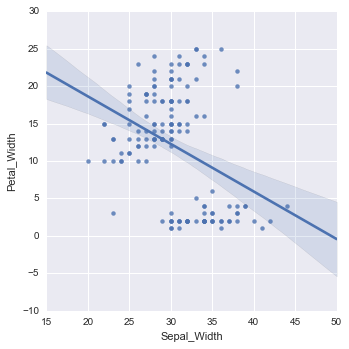

In [205]:
# Scatterplot of variables to include in regression
sns.lmplot(y='Petal_Width', x='Sepal_Width', data=dataset) # Add hue='Type' to observe subgroups

In [206]:
# Scipy linear regression using least-squares. Only works for univariate
scipy_linreg_width = stats.linregress(dataset['Sepal_Width'], dataset['Petal_Width']) # order of x,y != from lmplot
print(scipy_linreg_width)

LinregressResult(slope=-0.63526386357201514, intercept=31.336095245003637, rvalue=-0.36700657444549389, pvalue=3.8460249745576842e-06, stderr=0.13235317105294284)


**stats.linregress** provides limited information, and the library lacks a logistic regression function.  
Use the **statsmodels** library for regression

In [43]:
import statsmodels.formula.api as smf 
# statsmodels has two apis

In [220]:
reg_width = smf.ols(formula='Petal_Width ~ Sepal_Width', data=dataset)
reg_width_model = reg_width.fit()
reg_width_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Petal_Width   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     23.04
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           3.85e-06
Time:                        14:32:24   Log-Likelihood:                -505.10
No. Observations:                 150   AIC:                             1014.
Df Residuals:                     148   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      31.3361      4.085      7.671      0.000        23.264    39.408
Sepal_Width    -0.6353      0.132     -4.800      0.000        -0.897    -0.374
==============================================================================
Omnibus:                       12.432   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.318
Skew:                           0.300   Prob(JB):                       0.0425
Kurtosis:                       2.193   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
print(reg_width_model.summary()) # This way is better to obtain warnings

                            OLS Regression Results                            
Dep. Variable:            Petal_Width   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     23.04
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           3.85e-06
Time:                        14:32:26   Log-Likelihood:                -505.10
No. Observations:                 150   AIC:                             1014.
Df Residuals:                     148   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      31.3361      4.085      7.671      

In [222]:
print( dir(reg_width_model) )

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 

To plot residuals, an important quality control step, we need to use the predict() method. This function takes as input a matrix of predictive variables plus a new column for the intercept. To create this compound matrix we need to use the add_constant() function from the other statsmodels api: **statsmodels.api**

In [229]:
import statsmodels.api as sm

pred_var_matrix = dataset['Sepal_Width']
pred_var_matrix = sm.add_constant(pred_var_matrix)
sm_reg_width = sm.OLS( dataset['Petal_Width'], pred_var_matrix) # Note the difference from smf.ols
sm_reg_width_model = sm_reg_width.fit()

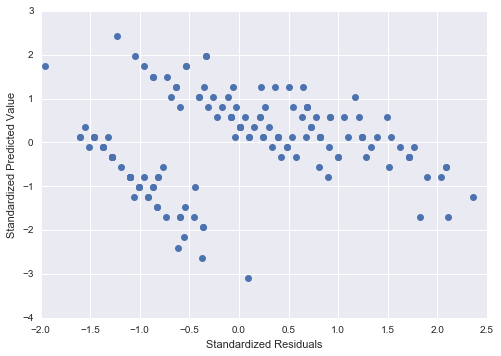

In [280]:
# Plotting residuals:
# Obtain predicted values for dependent variable
predicted_values = reg_width_model.predict(pred_var_matrix) # dataset['Sepal_Width'] is not valid input
sm_predicted_values = sm_reg_width_model.predict(pred_var_matrix)

residuals = dataset['Petal_Width'] - sm_predicted_values
normalized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
normalized_predicted = (sm_predicted_values - np.mean(sm_predicted_values)) / np.std(sm_predicted_values)

plt.plot(normalized_residuals, normalized_predicted, 'o')
plt.xlabel('Standardized Residuals')
plt.ylabel('Standardized Predicted Value')

In [252]:
influence = sm_reg_width_model.get_influence()
influence_dbetas = influence.summary_frame().filter(regex='dfb')
print(influence_dbetas)

Maximum value of DFBeta:  4862.38601061
     dfb_const  dfb_Sepal_Width
0     0.083039        -4.844042
1     0.083039        -4.844042
2     0.083039        -4.844042
3     0.330110        -4.844042
4     0.083039        -4.844042
5     0.082205        -4.795357
6     0.082205        -4.795357
7     0.082205        -4.795357
8     0.082205        -4.795357
9     0.082205        -4.795357
10    0.083039        -4.844042
11    0.082205        -4.795357
12    0.330110        -4.844042
13    0.083039        -4.844042
14    0.082205        -4.795357
15    0.082205        -4.795357
16    0.083039        -4.844042
17    0.326792        -4.795357
18    0.083039        -4.844042
19    0.083039        -4.844042
20    0.082205        -4.795357
21    0.083039        -4.844042
22    0.082205        -4.795357
23    0.082205        -4.795357
24    0.330110        -4.844042
25    0.082205        -4.795357
26    0.082205        -4.795357
27    0.083039        -4.844042
28    0.083039        -4.844042


In [255]:
influence_max = 2**(np.sqrt(sm_reg_width_model.nobs)) 
print('Maximum value of DFBeta: ', influence_max)
any(influence_dbetas['dfb_Sepal_Width'] > influence_max)

Maximum value of DFBeta:  4862.38601061


False

**Logistic Regression**

In [278]:
logregr_setosa_sw = sm.Logit(setosa_type, pred_var_matrix)
logregr_setosa_sw_model = logregr_setosa_sw.fit()
print(logregr_setosa_sw_model.summary())

Optimization terminated successfully.
         Current function value: 0.412015
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Type   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Oct 2016   Pseudo R-squ.:                  0.3527
Time:                        23:08:34   Log-Likelihood:                -61.802
converged:                       True   LL-Null:                       -95.477
                                        LLR p-value:                 2.274e-16
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         -15.6790      2.614     -5.999      0.000       -20.802   -10.556
Sepal_Width     0.4779    

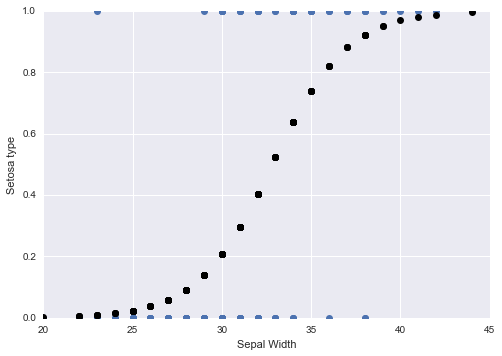

In [313]:
# Plot predicted values vs. data
logregr_predicted_values = logregr_setosa_sw_model.predict(pred_var_matrix)
plt.plot(dataset['Sepal_Width'], setosa_type, 'o')
plt.plot(dataset['Sepal_Width'], logregr_predicted_values,'ok')
plt.xlabel('Sepal Width')
plt.ylabel('Setosa type')

In [314]:
# Calculate odds ratio
print(np.exp(logregr_setosa_sw_model.params))

const          1.551280e-07
Sepal_Width    1.612628e+00
dtype: float64
